In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import requests


In [10]:
# study data files
an_wage_path = "C:/Users/khinh/Documents/activity/pythondata/test/Project_1/oecd_av_wage_1990 - 2021_annual_au_us.csv"
cpi_path = C:/Users/khinh/Documents/activity/pythondata/test/Project_1/oecd_cpi.csv"

# making dataframes
an_wage_df = pd.read_csv(an_wage_path)
cpi_df = pd.read_csv(cpi_path)

# drop unwanted rows
clean_an_wage_df = an_wage_df.iloc[0:64]

# drop unwanted columns
selected_columns = ['Country', 'Time', 'Unit Code', 'Value']

clean_an_wage_df = clean_an_wage_df[selected_columns]
clean_cpi_df = cpi_df[selected_columns]

# change column name
clean_an_wage_df = clean_an_wage_df.rename(columns={'Value':'Annual Wage(Avg.)'})
clean_cpi_df = clean_cpi_df.rename(columns={'Value':'CPI'})

# merge dataframes
dataset = pd.merge(clean_an_wage_df, clean_cpi_df, on=['Country', 'Time'])

# remove decimal of Annual Wage column 
dataset.loc[:,'Annual Wage(Avg.)'] = dataset.loc[:,'Annual Wage(Avg.)'].astype(int)

# Making two seperate Data Frames, 1 each for Australia and US
au_df = dataset.loc[dataset['Country'] == 'Australia']
us_df = dataset.loc[dataset['Country'] == 'United States']

# Printing Complete Data Frame
print(dataset.to_string())


          Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI
0       Australia  1990         AUD              33030          PC  7.333022
1       Australia  1991         AUD              34096          PC  3.176675
2       Australia  1992         AUD              35438          PC  1.012231
3       Australia  1993         AUD              36516          PC  1.753653
4       Australia  1994         AUD              37344          PC  1.969635
5       Australia  1995         AUD              38243          PC  4.627767
6       Australia  1996         AUD              40124          PC  2.615385
7       Australia  1997         AUD              41921          PC  0.224887
8       Australia  1998         AUD              43097          PC  0.860135
9       Australia  1999         AUD              44579          PC  1.483129
10      Australia  2000         AUD              46246          PC  4.457435
11      Australia  2001         AUD              48315          PC  4.407135

In [11]:
# Calculate Relative Cumulative CPI since 1990 (assuming cumulative CPI in 1990 = 7.333022)

# For AU

# Getting the CPI column
au_CPI_sr = au_df.loc[:,"CPI"].astype(float)

# calculating cumulative CPI and adding into a new Column
CPI_cumu_list1 = []
total1 = 0
for i in au_CPI_sr:
    total1 += i
    CPI_cumu_list1.append(total1)
au_df["CPI Cumulative"] = CPI_cumu_list1
print(au_df)

# US
# calculating cumulative CPI and adding into a new Column
us_CPI_sr = us_df.loc[:,"CPI"].astype(float)
CPI_cumu_list2 = []
total2 = 0
for i in us_CPI_sr:
    total2 += i
    CPI_cumu_list2.append(total2)
us_df["CPI Cumulative"] = CPI_cumu_list2

# printing Data Frame
print(us_df)


      Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
0   Australia  1990         AUD              33030          PC  7.333022   
1   Australia  1991         AUD              34096          PC  3.176675   
2   Australia  1992         AUD              35438          PC  1.012231   
3   Australia  1993         AUD              36516          PC  1.753653   
4   Australia  1994         AUD              37344          PC  1.969635   
5   Australia  1995         AUD              38243          PC  4.627767   
6   Australia  1996         AUD              40124          PC  2.615385   
7   Australia  1997         AUD              41921          PC  0.224887   
8   Australia  1998         AUD              43097          PC  0.860135   
9   Australia  1999         AUD              44579          PC  1.483129   
10  Australia  2000         AUD              46246          PC  4.457435   
11  Australia  2001         AUD              48315          PC  4.407135   
12  Australi

C:\Users\khinh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\khinh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


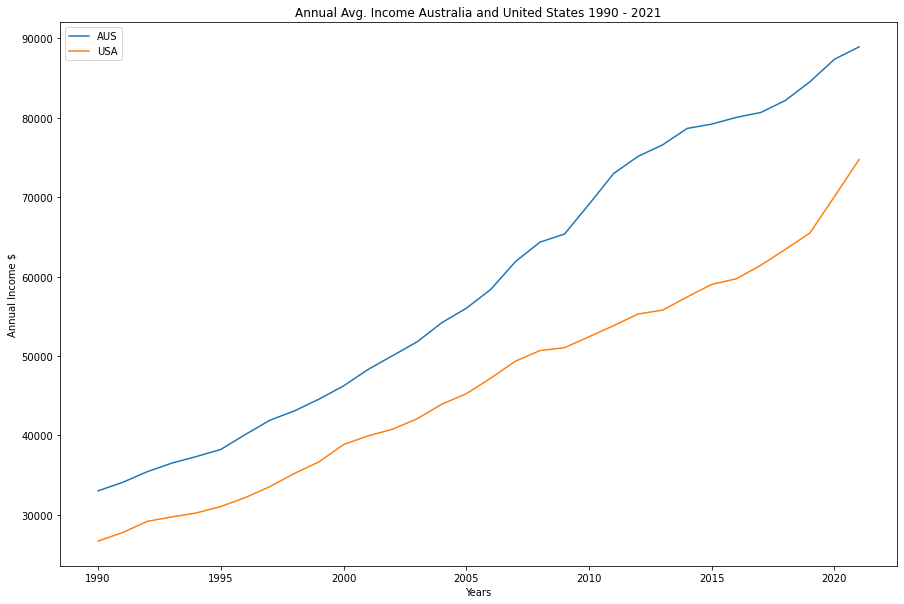

In [19]:
# Australia vs US Average wage growth

ax = au_df.plot(x='Time', y='Annual Wage(Avg.)', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='Annual Wage(Avg.)', label="USA" )

#  adding labels
plt.ylabel('Annual Income $')
plt.xlabel('Years')
plt.title('Annual Avg. Income Australia and United States 1990 - 2021')
plt.legend()
plt.show()


US and AU wage growth have a positive correlation. Australian wage growth showing signs of life. Australia wage growth @3.1% annually, but compared to the latest inflation numbers of 7.3% annually, most australians are seeing a decline in purchasing power.


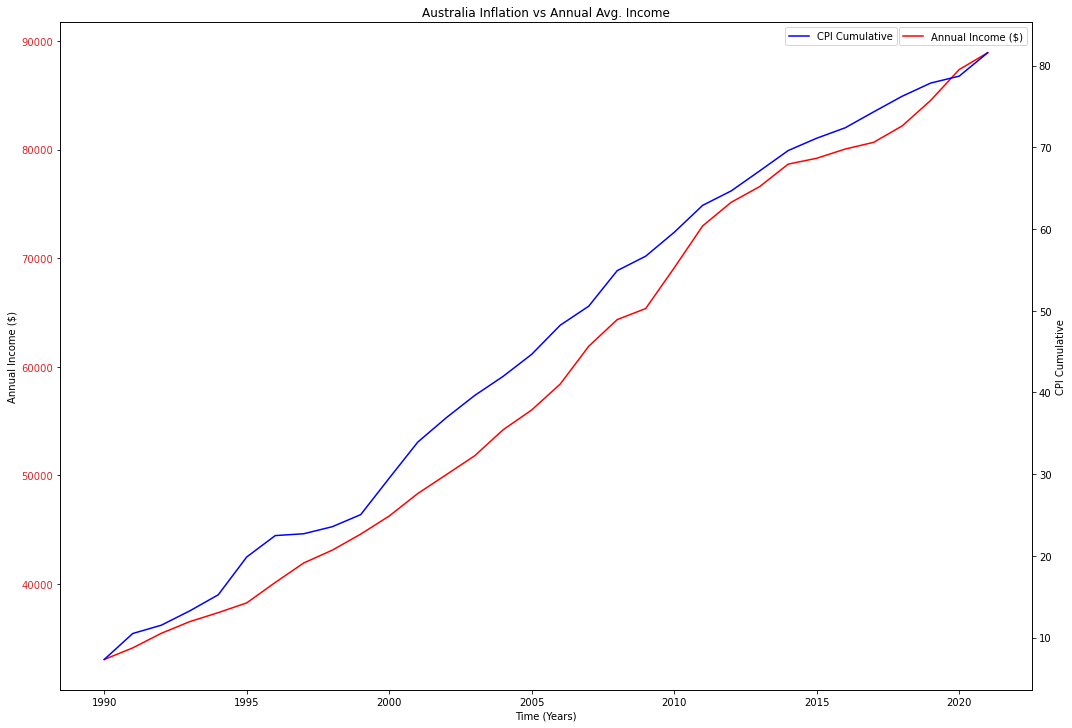

In [13]:
# Australia CPI vs Income

#  Assigning columns
y2 = au_df["CPI Cumulative"]
x2 = au_df["Annual Wage(Avg.)"]
x1 = au_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

# assigning the color of each line
color = 'tab:red'

# adding labels on each axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')
label1=['CPI Cumulative']
label2=['Annual Income ($)']


ax1.plot(x1, x2, color='r')

# adding tick parameters
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")

# plotting on 2 different axis
ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()

# adding labels and legend
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia Inflation vs Annual Avg. Income')
plt.show()

Australia inflation has been growing the last three decades so as the annual income has been rising accordingly to keep up with inflation.Although growing annual income is a good thing, the way inflation rising is not great to see. It is worrying that how much annual income rise could keep up with inflation and when inflation is peaked, economy would be crashed. So, it is very important to find strategies that could counteract inflation rate and protect economy collapse.


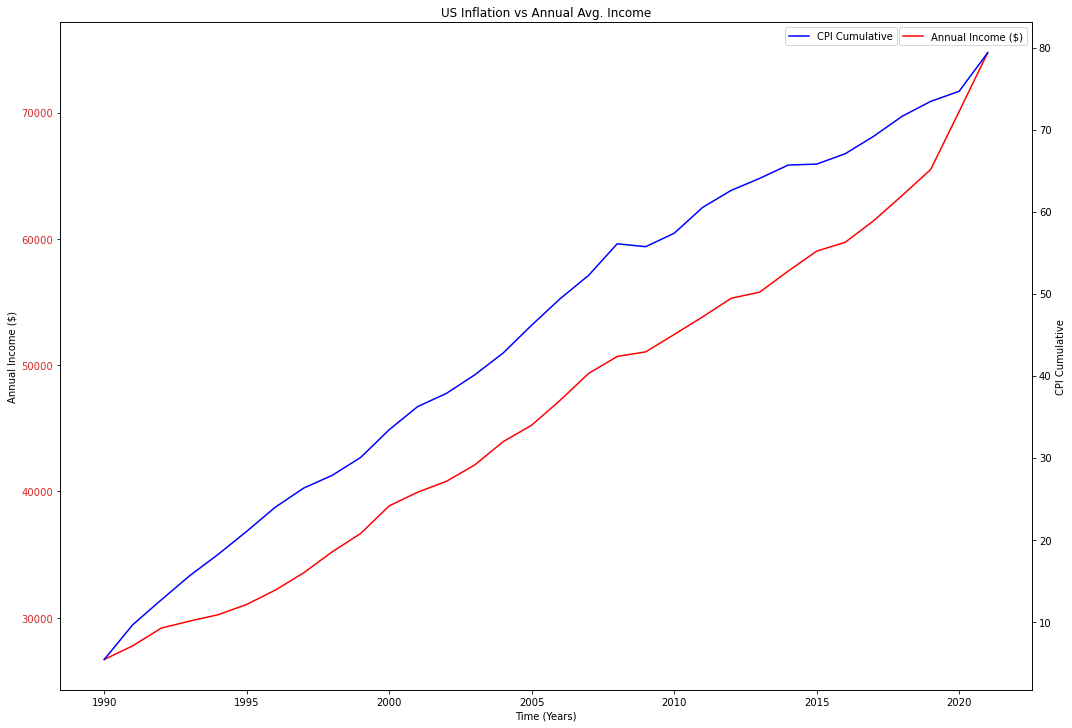

In [21]:
# US CPI vs Income

#  Assigning columns
y2 = us_df["CPI Cumulative"]
x2 = us_df["Annual Wage(Avg.)"]
x1 = us_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

# assigning the color of each line
color = 'tab:red'

# adding labels on each axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')
label1=['CPI Cumulative']
label2=['Annual Income ($)']


ax1.plot(x1, x2, color='r')

# adding tick parameters
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")

# plotting on 2 different axis
ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()

# adding labels and legend
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Annual Avg. Income')
plt.show()

Same as in Australia, US has gradually increased annual income, as well as inflation.
However, it is interesting to see that the rise of annual income has been gradual rise until 2020 and a further steeper rise after that period to meet inflation rate.


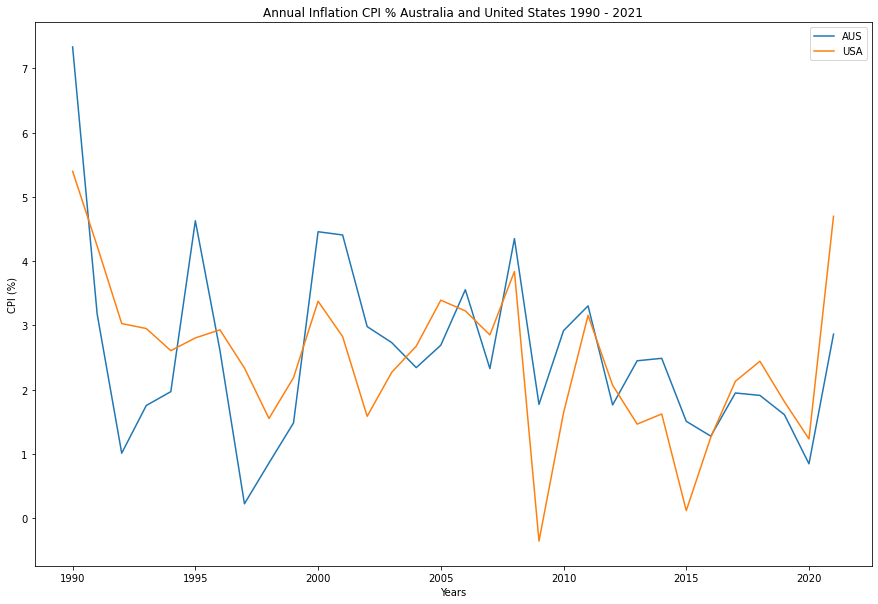

In [14]:
# Australia vs US CPI (Year-ended)

ax = au_df.plot(x='Time', y='CPI', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='CPI', label="USA" )

# Adding labels
plt.ylabel('CPI (%)')
plt.xlabel('Years')
plt.title('Annual Inflation CPI % Australia and United States 1990 - 2021')
plt.legend()
plt.show()

At a glance into nature of CPI comparing Australia and US, both shows similar pictures as it reflects global economy status.
Australians experience a more rapid swinging nature of CPI changes between 1990 and 2000, and since then its CPI changes has been become gradual decline until it rise again in the end of 2021.Meanwhile, US display a more stable CPI swings apart from a short patch between 2010-15. However, both show the same picture of inflation rise in 2021 and predict to be ongoing rise.


Text(0.5, 1.0, 'Australia Inflation vs Annual Avg. Income')

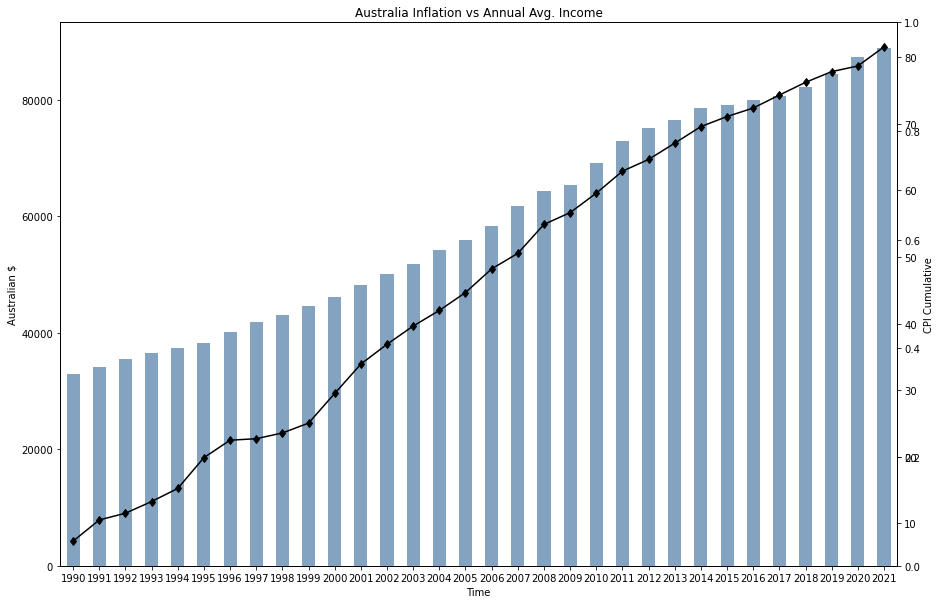

In [15]:
# Australia CPI vs Income

# Setting index to Time
time_idx_df = au_df.set_index(au_df['Time'])

# Plotting the chart
fig, ax1 = plt.subplots(figsize = (15,10))
time_idx_df['Annual Wage(Avg.)'].plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6))
au_df['CPI Cumulative'].plot(kind='line', marker='d', secondary_y=True, color='black')
ax2 = ax1.twinx()
ax1.set_ylabel('Australian $')
ax2.set_ylabel('CPI Cumulative')
plt.title('Australia Inflation vs Annual Avg. Income')


It is good to see that Australia annual income has been gradually increasing since 1990. 
In 2021, its annual average income is double of that of three decades ago, which is good to see a healthy spending power and economy growth in the last few decades. As compare to CPI, its purchasing is less in years heading into millennium, but since then annual income and inflation goes opposite direction, showing a healthy economy growth of Australia in the last two decades.


In [16]:
# Trimming the Data Frame to get values from Years 2003 to 2021

trim_df = us_df.loc[us_df["Time"]>=2003]
trim_df = trim_df.rename(columns={'Time':'year'})
trim_df


,Country,year,Unit Code_x,Annual Wage(Avg.),Unit Code_y,CPI,CPI Cumulative
45,United States,2003,USD,42101,PC,2.270095,40.094614
46,United States,2004,USD,43945,PC,2.677237,42.771851
47,United States,2005,USD,45254,PC,3.392747,46.164598
48,United States,2006,USD,47225,PC,3.225944,49.390542
49,United States,2007,USD,49354,PC,2.852673,52.243215
50,United States,2008,USD,50689,PC,3.839100,56.082315
51,United States,2009,USD,51055,PC,-0.355546,55.726769
52,United States,2010,USD,52428,PC,1.640043,57.366812
53,United States,2011,USD,53827,PC,3.156842,60.523654
54,United States,2012,USD,55298,PC,2.069337,62.592991


In [17]:
# Using NASDAQ API to fetch global oil prices

# storing key in a variable
key = "HuzvVbyZtiD8rqcs_m4i"

# making a url string
url = f"https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.json?api_key={key}"

# making a request to the url and storing in response variable
response = requests.get(url).json()

# making a Data Frame of the response
oil_df = pd.DataFrame.from_dict(response)

# grabbed the Data values and assign them to a new Data Frame also assigning column names
new_dataset = pd.DataFrame(oil_df['dataset']['data'],columns=['date','oil_price'])

# grabbing the year values and assign them to a new column
new_dataset['year'] = new_dataset['date'].str[0:4].astype(int)

# using groupby() function to group by years and calculating the mean of oil prices for each year
grouped_df = new_dataset.groupby(['year']).mean()

# selecting the required rows (years) of the Dataset
new_df = grouped_df.iloc[0:19,:]

# merging the Data Frames to add Oil Prices
final_df = pd.merge(trim_df, new_df, on=['year'])

# printing the final merged Data Frame
final_df


,Country,year,Unit Code_x,Annual Wage(Avg.),Unit Code_y,CPI,CPI Cumulative,oil_price
0,United States,2003,USD,42101,PC,2.270095,40.094614,28.123735
1,United States,2004,USD,43945,PC,2.677237,42.771851,36.009115
2,United States,2005,USD,45254,PC,3.392747,46.164598,50.707248
3,United States,2006,USD,47225,PC,3.225944,49.390542,61.080584
4,United States,2007,USD,49354,PC,2.852673,52.243215,69.076705
5,United States,2008,USD,50689,PC,3.839100,56.082315,94.452171
6,United States,2009,USD,51055,PC,-0.355546,55.726769,61.058333
7,United States,2010,USD,52428,PC,1.640043,57.366812,77.445907
8,United States,2011,USD,53827,PC,3.156842,60.523654,107.464147
9,United States,2012,USD,55298,PC,2.069337,62.592991,109.452752


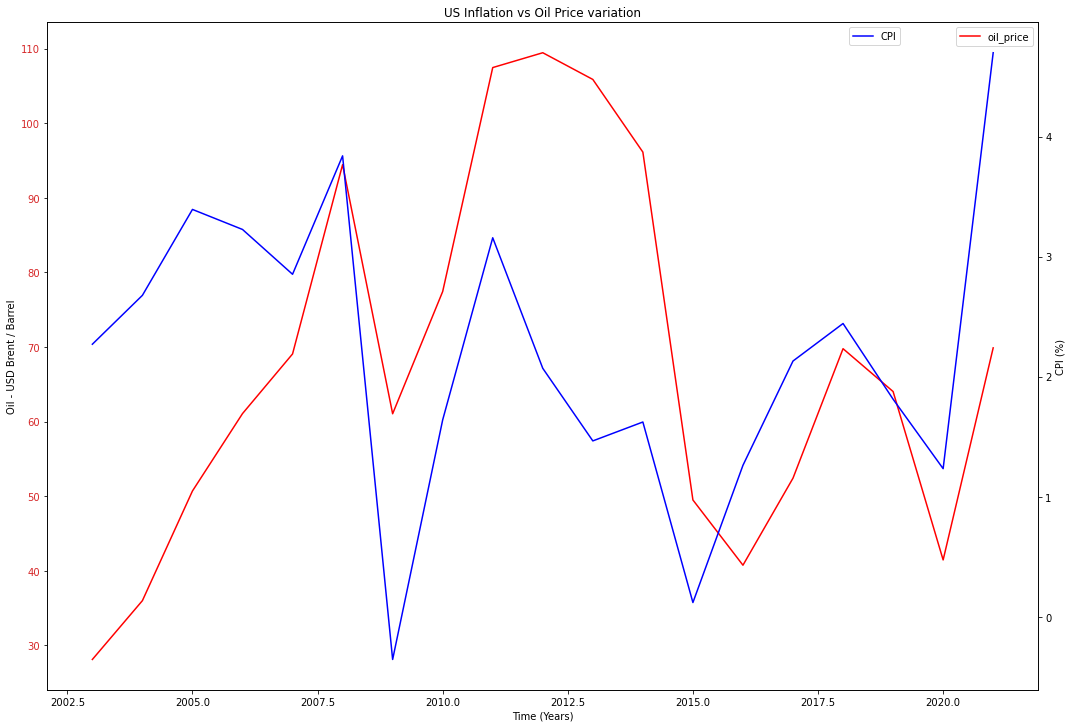

In [18]:
#  Assigning columns

y2 = final_df["CPI"]
x2 = final_df["oil_price"]
x1 = final_df["year"]

fig, ax1 = plt.subplots(figsize = (15,10))

# adding colors to each line
color = 'tab:red'

# setting labels to axis
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Oil - USD Brent / Barrel')
label1=['CPI']
label2=['oil_price']


ax1.plot(x1, x2, color='r')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")

# plotting on 2 different axis
ax2 = ax1.twinx()

ax2.set_ylabel('CPI (%)')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()

# adding Title and Legend
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Oil Price variation')
plt.show()

This graph show comparison between US inflation and oil price changes over the last three decades
It is quite distinctive that ups and downs of oil price changes is more or less equal pattern as changes in inflation.
That shows that US inflation is depends on the oil price variation and changes in oil price has major influence over inflation as well as its economy. It can be said that US economic growth and inflation depends on oil price because its main economy is industrialisation, depends on oil. So, it is obvious that whose control over oil resource may have influence on inflation and economy, In other term, should you are able to have control over oil reserve/resource or should your main economy is less dependent on oil, its economy will be less influenced by those who control oil resource. That’s why  we are trying to have technology, shifting big ways towards clean renewable energy production, rather than depending on oil resource, which is limited
